# Coefficient Comparison: Stata vs R Polars

This notebook compares the coefficients and standard errors from `did_multiplegt_dyn` across:
- **Stata** (ground truth)
- **R Polars** (DIDmultiplegtDYNpolars package)

We analyze both Effects and Placebos across all test cases.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Data path
data_path = Path('/Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX')

print("Notebook ready for coefficient comparison analysis")

Notebook ready for coefficient comparison analysis


## 1. Load Data

In [19]:
# Load coefficient files
stata_file = data_path / 'coefficients_stata.csv'
polars_file = data_path / 'coefficients_R_polars.csv'

# Check if files exist
print(f"Stata file exists: {stata_file.exists()}")
print(f"R Polars file exists: {polars_file.exists()}")

if stata_file.exists() and polars_file.exists():
    df_stata = pd.read_csv(stata_file)
    df_polars = pd.read_csv(polars_file)
    
    print(f"\nStata coefficients: {len(df_stata)} rows")
    print(f"R Polars coefficients: {len(df_polars)} rows")
else:
    print("\nPlease run the Stata and R scripts first to generate the coefficient files.")

Stata file exists: True
R Polars file exists: True

Stata coefficients: 114 rows
R Polars coefficients: 114 rows


In [20]:
# Display first few rows of each dataset
print("Stata Coefficients:")
display(df_stata.head(10))

print("\nR Polars Coefficients:")
display(df_polars.head(10))

Stata Coefficients:


,Example,Model,Type,Index,Estimate,SE
0,Wagepan,Baseline,Effect,1,0.040951,0.033971
1,Wagepan,Baseline,Effect,2,0.021888,0.039339
2,Wagepan,Baseline,Effect,3,0.031102,0.042598
3,Wagepan,Baseline,Effect,4,0.018163,0.047210
4,Wagepan,Baseline,Effect,5,-0.049966,0.054625
5,Wagepan,Placebos,Effect,1,0.040951,0.033971
6,Wagepan,Placebos,Effect,2,0.021888,0.039339
7,Wagepan,Placebos,Effect,3,0.031102,0.042598
8,Wagepan,Placebos,Effect,4,0.018163,0.047210
9,Wagepan,Placebos,Effect,5,-0.049966,0.054625



R Polars Coefficients:


,Example,Model,Type,Index,Estimate,SE
0,Wagepan,Baseline,Effect,1,0.040951,0.033971
1,Wagepan,Baseline,Effect,2,0.021888,0.039339
2,Wagepan,Baseline,Effect,3,0.031102,0.042598
3,Wagepan,Baseline,Effect,4,0.018163,0.047210
4,Wagepan,Baseline,Effect,5,-0.049966,0.054625
5,Wagepan,Placebos,Effect,1,0.040951,0.033971
6,Wagepan,Placebos,Effect,2,0.021888,0.039339
7,Wagepan,Placebos,Effect,3,0.031102,0.042598
8,Wagepan,Placebos,Effect,4,0.018163,0.047210
9,Wagepan,Placebos,Effect,5,-0.049966,0.054625


## 2. Merge and Compare

In [21]:
# Merge the two datasets
df_merged = pd.merge(
    df_stata,
    df_polars,
    on=['Example', 'Model', 'Type', 'Index'],
    suffixes=('_Stata', '_Polars'),
    how='outer'
)

print(f"Merged dataset: {len(df_merged)} rows")
print(f"\nMatched rows: {df_merged.dropna().shape[0]}")
print(f"Stata-only rows: {df_merged['Estimate_Polars'].isna().sum()}")
print(f"Polars-only rows: {df_merged['Estimate_Stata'].isna().sum()}")

display(df_merged.head(15))

Merged dataset: 114 rows

Matched rows: 114
Stata-only rows: 0
Polars-only rows: 0


,Example,Model,Type,Index,Estimate_Stata,SE_Stata,Estimate_Polars,SE_Polars
0,Deryugina,Baseline,Effect,1,0.010863,0.001617,0.010863,0.001617
1,Deryugina,Baseline,Effect,2,0.012792,0.002365,0.012792,0.002365
2,Deryugina,Baseline,Effect,3,0.015800,0.003007,0.015800,0.003007
3,Deryugina,Baseline,Effect,4,0.016389,0.003393,0.016389,0.003393
4,Deryugina,Baseline,Effect,5,0.023070,0.003897,0.023070,0.003897
5,Deryugina,Baseline,Effect,6,0.026829,0.004251,0.026829,0.004251
6,Deryugina,Baseline,Effect,7,0.037715,0.004493,0.037715,0.004493
7,Deryugina,Baseline,Effect,8,0.039292,0.005039,0.039292,0.005039
8,Deryugina,Baseline,Effect,9,0.035109,0.005519,0.035109,0.005519
9,Deryugina,Baseline,Effect,10,0.049402,0.006029,0.049402,0.006029


In [22]:
# Calculate differences (only for matched rows)
df_compare = df_merged.dropna().copy()

# Absolute differences
df_compare['Estimate_Diff'] = df_compare['Estimate_Polars'] - df_compare['Estimate_Stata']
df_compare['SE_Diff'] = df_compare['SE_Polars'] - df_compare['SE_Stata']

# Relative differences (percentage)
df_compare['Estimate_Rel_Diff'] = np.where(
    df_compare['Estimate_Stata'] != 0,
    (df_compare['Estimate_Polars'] - df_compare['Estimate_Stata']) / np.abs(df_compare['Estimate_Stata']) * 100,
    np.where(df_compare['Estimate_Polars'] == 0, 0, np.inf)
)

df_compare['SE_Rel_Diff'] = np.where(
    df_compare['SE_Stata'] != 0,
    (df_compare['SE_Polars'] - df_compare['SE_Stata']) / df_compare['SE_Stata'] * 100,
    np.where(df_compare['SE_Polars'] == 0, 0, np.inf)
)

# Ratio (Polars / Stata)
df_compare['Estimate_Ratio'] = np.where(
    df_compare['Estimate_Stata'] != 0,
    df_compare['Estimate_Polars'] / df_compare['Estimate_Stata'],
    np.nan
)

df_compare['SE_Ratio'] = np.where(
    df_compare['SE_Stata'] != 0,
    df_compare['SE_Polars'] / df_compare['SE_Stata'],
    np.nan
)

print(f"Comparison dataset: {len(df_compare)} matched rows")
display(df_compare.head(15))

Comparison dataset: 114 matched rows


,Example,Model,Type,Index,Estimate_Stata,SE_Stata,Estimate_Polars,SE_Polars,Estimate_Diff,SE_Diff,Estimate_Rel_Diff,SE_Rel_Diff,Estimate_Ratio,SE_Ratio
0,Deryugina,Baseline,Effect,1,0.010863,0.001617,0.010863,0.001617,-5.609250e-11,-1.704310e-11,-5.163665e-07,-1.054019e-06,1.0,1.0
1,Deryugina,Baseline,Effect,2,0.012792,0.002365,0.012792,0.002365,-7.134770e-10,-2.263660e-11,-5.577619e-06,-9.571107e-07,1.0,1.0
2,Deryugina,Baseline,Effect,3,0.015800,0.003007,0.015800,0.003007,-2.709418e-10,-1.607360e-11,-1.714771e-06,-5.344575e-07,1.0,1.0
3,Deryugina,Baseline,Effect,4,0.016389,0.003393,0.016389,0.003393,7.517490e-11,2.181190e-11,4.587012e-07,6.428538e-07,1.0,1.0
4,Deryugina,Baseline,Effect,5,0.023070,0.003897,0.023070,0.003897,4.271774e-10,-3.153770e-11,1.851664e-06,-8.093133e-07,1.0,1.0
5,Deryugina,Baseline,Effect,6,0.026829,0.004251,0.026829,0.004251,1.796676e-09,-2.419670e-11,6.696890e-06,-5.692336e-07,1.0,1.0
6,Deryugina,Baseline,Effect,7,0.037715,0.004493,0.037715,0.004493,-2.178496e-09,6.653300e-12,-5.776248e-06,1.480957e-07,1.0,1.0
7,Deryugina,Baseline,Effect,8,0.039292,0.005039,0.039292,0.005039,-1.019097e-09,-7.040640e-11,-2.593633e-06,-1.397109e-06,1.0,1.0
8,Deryugina,Baseline,Effect,9,0.035109,0.005519,0.035109,0.005519,5.152564e-09,-1.960410e-11,1.467592e-05,-3.552422e-07,1.0,1.0
9,Deryugina,Baseline,Effect,10,0.049402,0.006029,0.049402,0.006029,3.092723e-09,-3.250790e-11,6.260372e-06,-5.391906e-07,1.0,1.0


## 3. Summary Statistics

In [23]:
# Summary statistics for differences
print("=" * 80)
print("SUMMARY STATISTICS: Absolute Differences (Polars - Stata)")
print("=" * 80)

summary_cols = ['Estimate_Diff', 'SE_Diff']
summary_stats = df_compare[summary_cols].describe()
summary_stats.loc['abs_max'] = df_compare[summary_cols].abs().max()
summary_stats.loc['abs_mean'] = df_compare[summary_cols].abs().mean()
display(summary_stats)

print("\n" + "=" * 80)
print("SUMMARY STATISTICS: Relative Differences (%)")
print("=" * 80)

# Filter out infinite values for relative differences
rel_cols = ['Estimate_Rel_Diff', 'SE_Rel_Diff']
df_finite = df_compare[np.isfinite(df_compare['Estimate_Rel_Diff']) & np.isfinite(df_compare['SE_Rel_Diff'])]
rel_stats = df_finite[rel_cols].describe()
rel_stats.loc['abs_max'] = df_finite[rel_cols].abs().max()
rel_stats.loc['abs_mean'] = df_finite[rel_cols].abs().mean()
display(rel_stats)

SUMMARY STATISTICS: Absolute Differences (Polars - Stata)


,Estimate_Diff,SE_Diff
count,1.140000e+02,1.140000e+02
mean,1.190304e-09,-6.301999e-10
std,4.337475e-09,1.328440e-09
min,-8.901230e-09,-6.395697e-09
25%,-6.107055e-10,-1.113631e-09
50%,-6.266700e-12,-3.130815e-11
75%,1.742194e-09,3.542872e-11
max,1.781549e-08,2.272083e-09
abs_max,1.781549e-08,6.395697e-09
abs_mean,2.570400e-09,8.851354e-10



SUMMARY STATISTICS: Relative Differences (%)


,Estimate_Rel_Diff,SE_Rel_Diff
count,1.140000e+02,1.140000e+02
mean,-4.311523e-05,-8.289461e-07
std,4.332510e-04,3.016921e-06
min,-4.564468e-03,-8.351258e-06
25%,-3.308698e-06,-2.620462e-06
50%,-1.438293e-07,-5.843284e-07
75%,5.709162e-06,4.086357e-07
max,2.004621e-04,1.618930e-05
abs_max,4.564468e-03,1.618930e-05
abs_mean,5.831129e-05,2.140894e-06


In [24]:
# Summary by Type (Effect vs Placebo)
print("=" * 80)
print("SUMMARY BY TYPE")
print("=" * 80)

for coef_type in ['Effect', 'Placebo']:
    df_type = df_compare[df_compare['Type'] == coef_type]
    if len(df_type) > 0:
        print(f"\n{coef_type}s ({len(df_type)} observations):")
        print(f"  Estimate Diff - Mean: {df_type['Estimate_Diff'].mean():.2e}, Max Abs: {df_type['Estimate_Diff'].abs().max():.2e}")
        print(f"  SE Diff       - Mean: {df_type['SE_Diff'].mean():.2e}, Max Abs: {df_type['SE_Diff'].abs().max():.2e}")
        
        # SE Ratio statistics
        se_ratio = df_type['SE_Ratio'].dropna()
        if len(se_ratio) > 0:
            print(f"  SE Ratio      - Mean: {se_ratio.mean():.6f}, Min: {se_ratio.min():.6f}, Max: {se_ratio.max():.6f}")

SUMMARY BY TYPE

Effects (74 observations):
  Estimate Diff - Mean: 1.69e-09, Max Abs: 1.78e-08
  SE Diff       - Mean: -9.21e-10, Max Abs: 6.40e-09
  SE Ratio      - Mean: 1.000000, Min: 1.000000, Max: 1.000000

Placebos (40 observations):
  Estimate Diff - Mean: 2.74e-10, Max Abs: 8.90e-09
  SE Diff       - Mean: -9.30e-11, Max Abs: 2.27e-09
  SE Ratio      - Mean: 1.000000, Min: 1.000000, Max: 1.000000


In [25]:
# Summary by Example and Model
print("=" * 80)
print("SUMMARY BY EXAMPLE AND MODEL")
print("=" * 80)

summary_by_model = df_compare.groupby(['Example', 'Model']).agg({
    'Estimate_Diff': ['mean', lambda x: x.abs().max()],
    'SE_Diff': ['mean', lambda x: x.abs().max()],
    'SE_Ratio': ['mean', 'min', 'max']
}).round(8)

summary_by_model.columns = ['Est_Diff_Mean', 'Est_Diff_MaxAbs', 'SE_Diff_Mean', 'SE_Diff_MaxAbs', 
                            'SE_Ratio_Mean', 'SE_Ratio_Min', 'SE_Ratio_Max']
display(summary_by_model)

SUMMARY BY EXAMPLE AND MODEL


Est_Diff_Mean  Est_Diff_MaxAbs  SE_Diff_Mean  \
Example     Model                                                           
Deryugina   Baseline          0.000000e+00     1.000000e-08          -0.0   
Favara_Imbs Baseline         -0.000000e+00     0.000000e+00           0.0   
Gentzkow    Non_Normalized   -0.000000e+00     0.000000e+00           0.0   
            Normalized       -0.000000e+00     0.000000e+00           0.0   
Wagepan     Baseline          0.000000e+00     1.000000e-08          -0.0   
            Cluster           0.000000e+00     1.000000e-08           0.0   
            Controls          0.000000e+00     1.000000e-08          -0.0   
            Normalized        0.000000e+00     0.000000e+00          -0.0   
            Placebos          0.000000e+00     1.000000e-08          -0.0   
            Same_Switchers    1.000000e-08     1.000000e-08          -0.0   
            Switchers_In      0.000000e+00     2.000000e-08          -0.0   
            Switchers_Out    -0.000000e+00     1.000000e-08          -0.0   
            Trends_Lin       -0.000000e+00     1.000000e-08          -0.0   
            Trends_Nonparam   0.000000e+00     1.000000e-08           0.0   

                             SE_Diff_MaxAbs  SE_Ratio_Mean  SE_Ratio_Min  \
Example     Model                                                          
Deryugina   Baseline           0.000000e+00            1.0           1.0   
Favara_Imbs Baseline           0.000000e+00            1.0           1.0   
Gentzkow    Non_Normalized     0.000000e+00            1.0           1.0   
            Normalized         0.000000e+00            1.0           1.0   
Wagepan     Baseline           0.000000e+00            1.0           1.0   
            Cluster            0.000000e+00            1.0           1.0   
            Controls           0.000000e+00            1.0           1.0   
            Normalized         0.000000e+00            1.0           1.0   
            Placebos           0.000000e+00            1.0           1.0   
            Same_Switchers     0.000000e+00            1.0           1.0   
            Switchers_In       0.000000e+00            1.0           1.0   
            Switchers_Out      0.000000e+00            1.0           1.0   
            Trends_Lin         1.000000e-08            1.0           1.0   
            Trends_Nonparam    0.000000e+00            1.0           1.0   

                             SE_Ratio_Max  
Example     Model                          
Deryugina   Baseline                  1.0  
Favara_Imbs Baseline                  1.0  
Gentzkow    Non_Normalized            1.0  
            Normalized                1.0  
Wagepan     Baseline                  1.0  
            Cluster                   1.0  
            Controls                  1.0  
            Normalized                1.0  
            Placebos                  1.0  
            Same_Switchers            1.0  
            Switchers_In              1.0  
            Switchers_Out             1.0  
            Trends_Lin                1.0  
            Trends_Nonparam           1.0

## 4. Visualizations

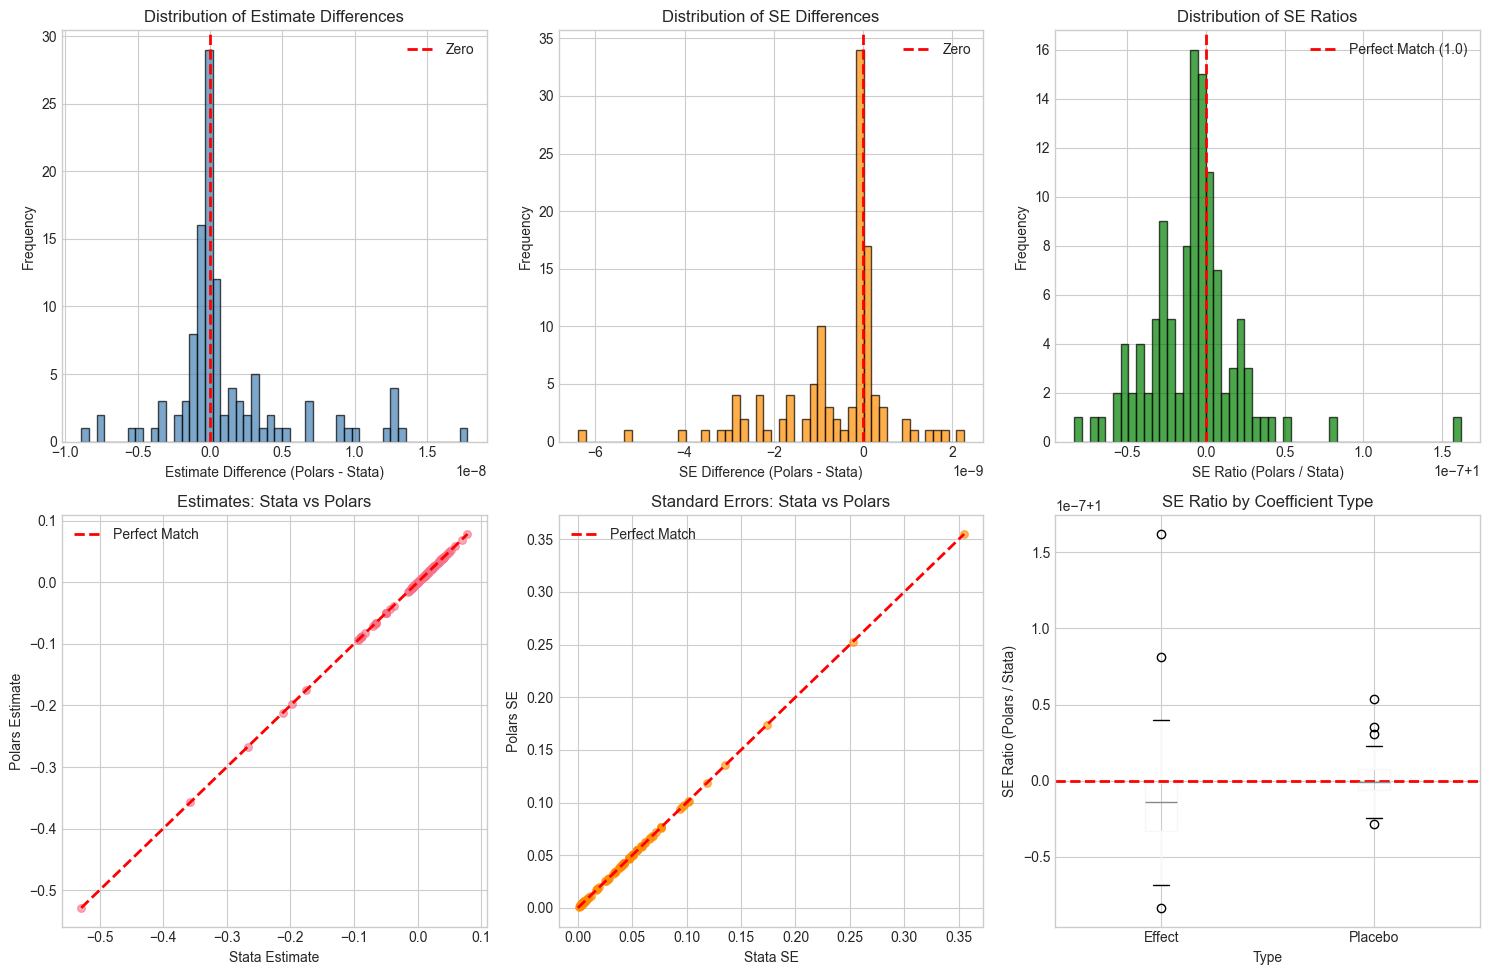


Figure saved to: /Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX/coefficient_comparison_overview.png


In [26]:
# Create figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Histogram of Estimate Differences
ax1 = axes[0, 0]
ax1.hist(df_compare['Estimate_Diff'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
ax1.set_xlabel('Estimate Difference (Polars - Stata)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Estimate Differences')
ax1.legend()

# 2. Histogram of SE Differences
ax2 = axes[0, 1]
ax2.hist(df_compare['SE_Diff'], bins=50, edgecolor='black', alpha=0.7, color='darkorange')
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
ax2.set_xlabel('SE Difference (Polars - Stata)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of SE Differences')
ax2.legend()

# 3. Histogram of SE Ratios
ax3 = axes[0, 2]
se_ratio_finite = df_compare['SE_Ratio'].dropna()
ax3.hist(se_ratio_finite, bins=50, edgecolor='black', alpha=0.7, color='green')
ax3.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Perfect Match (1.0)')
ax3.set_xlabel('SE Ratio (Polars / Stata)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of SE Ratios')
ax3.legend()

# 4. Scatter plot: Stata vs Polars Estimates
ax4 = axes[1, 0]
ax4.scatter(df_compare['Estimate_Stata'], df_compare['Estimate_Polars'], alpha=0.6, s=30)
lims = [min(df_compare['Estimate_Stata'].min(), df_compare['Estimate_Polars'].min()),
        max(df_compare['Estimate_Stata'].max(), df_compare['Estimate_Polars'].max())]
ax4.plot(lims, lims, 'r--', linewidth=2, label='Perfect Match')
ax4.set_xlabel('Stata Estimate')
ax4.set_ylabel('Polars Estimate')
ax4.set_title('Estimates: Stata vs Polars')
ax4.legend()

# 5. Scatter plot: Stata vs Polars SEs
ax5 = axes[1, 1]
ax5.scatter(df_compare['SE_Stata'], df_compare['SE_Polars'], alpha=0.6, s=30, color='darkorange')
lims = [0, max(df_compare['SE_Stata'].max(), df_compare['SE_Polars'].max())]
ax5.plot(lims, lims, 'r--', linewidth=2, label='Perfect Match')
ax5.set_xlabel('Stata SE')
ax5.set_ylabel('Polars SE')
ax5.set_title('Standard Errors: Stata vs Polars')
ax5.legend()

# 6. Box plot of SE Ratios by Type
ax6 = axes[1, 2]
df_compare.boxplot(column='SE_Ratio', by='Type', ax=ax6)
ax6.axhline(y=1, color='red', linestyle='--', linewidth=2)
ax6.set_xlabel('Type')
ax6.set_ylabel('SE Ratio (Polars / Stata)')
ax6.set_title('SE Ratio by Coefficient Type')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.savefig(data_path / 'coefficient_comparison_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to: {data_path / 'coefficient_comparison_overview.png'}")

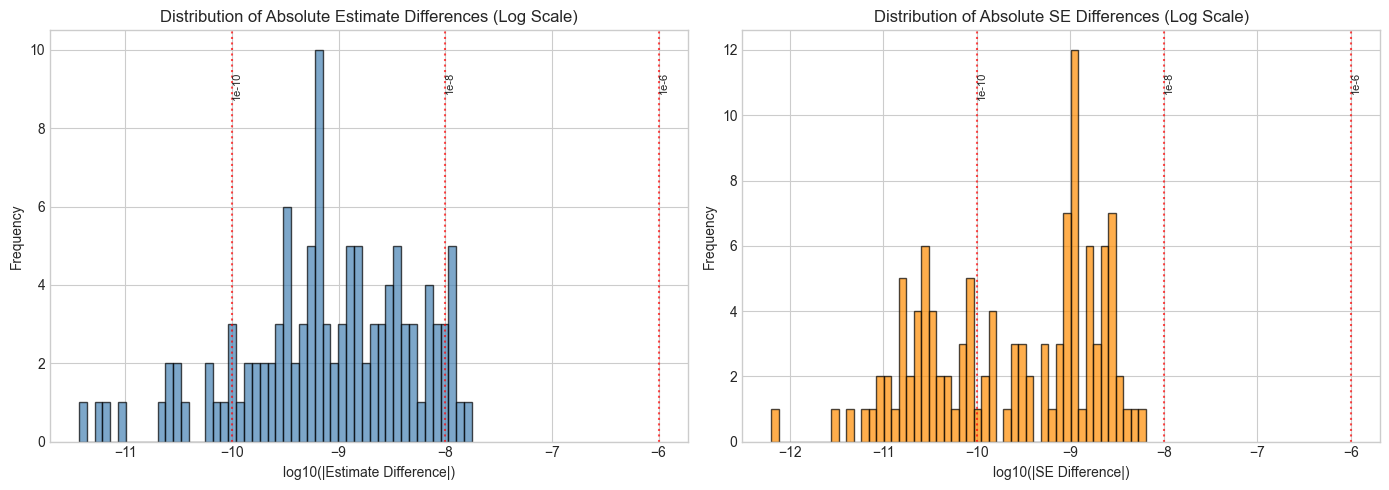

Figure saved to: /Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX/coefficient_comparison_log_scale.png


In [27]:
# Detailed histograms with log scale for very small differences
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Absolute differences on log scale
ax1 = axes[0]
abs_est_diff = df_compare['Estimate_Diff'].abs()
abs_est_diff_nonzero = abs_est_diff[abs_est_diff > 0]
if len(abs_est_diff_nonzero) > 0:
    ax1.hist(np.log10(abs_est_diff_nonzero), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax1.set_xlabel('log10(|Estimate Difference|)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Absolute Estimate Differences (Log Scale)')
    
    # Add reference lines
    for threshold, label in [(-6, '1e-6'), (-8, '1e-8'), (-10, '1e-10')]:
        ax1.axvline(x=threshold, color='red', linestyle=':', alpha=0.7)
        ax1.text(threshold, ax1.get_ylim()[1]*0.9, label, rotation=90, va='top', fontsize=8)

ax2 = axes[1]
abs_se_diff = df_compare['SE_Diff'].abs()
abs_se_diff_nonzero = abs_se_diff[abs_se_diff > 0]
if len(abs_se_diff_nonzero) > 0:
    ax2.hist(np.log10(abs_se_diff_nonzero), bins=50, edgecolor='black', alpha=0.7, color='darkorange')
    ax2.set_xlabel('log10(|SE Difference|)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Absolute SE Differences (Log Scale)')
    
    # Add reference lines
    for threshold, label in [(-6, '1e-6'), (-8, '1e-8'), (-10, '1e-10')]:
        ax2.axvline(x=threshold, color='red', linestyle=':', alpha=0.7)
        ax2.text(threshold, ax2.get_ylim()[1]*0.9, label, rotation=90, va='top', fontsize=8)

plt.tight_layout()
plt.savefig(data_path / 'coefficient_comparison_log_scale.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {data_path / 'coefficient_comparison_log_scale.png'}")

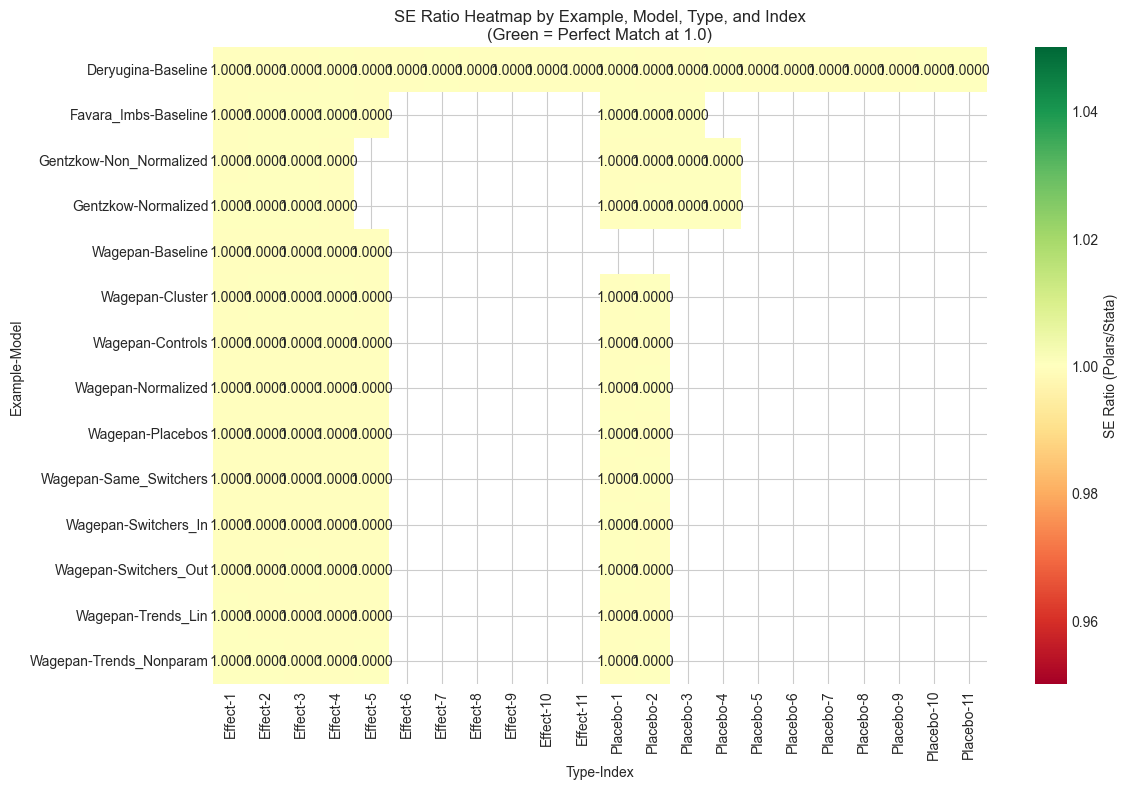

Figure saved to: /Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX/se_ratio_heatmap.png


In [28]:
# Heatmap of SE Ratios by Example and Model
fig, ax = plt.subplots(figsize=(12, 8))

# Pivot table for SE Ratio
pivot_se = df_compare.pivot_table(
    values='SE_Ratio',
    index=['Example', 'Model'],
    columns=['Type', 'Index'],
    aggfunc='mean'
)

# Create heatmap
sns.heatmap(pivot_se, annot=True, fmt='.4f', cmap='RdYlGn', center=1.0,
            vmin=0.95, vmax=1.05, ax=ax, cbar_kws={'label': 'SE Ratio (Polars/Stata)'})
ax.set_title('SE Ratio Heatmap by Example, Model, Type, and Index\n(Green = Perfect Match at 1.0)')
plt.tight_layout()
plt.savefig(data_path / 'se_ratio_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {data_path / 'se_ratio_heatmap.png'}")

## 5. Detailed Comparison Table

In [29]:
# Create a detailed comparison table
df_detail = df_compare[['Example', 'Model', 'Type', 'Index', 
                        'Estimate_Stata', 'Estimate_Polars', 'Estimate_Diff',
                        'SE_Stata', 'SE_Polars', 'SE_Diff', 'SE_Ratio']].copy()

# Format for display
df_detail['Match_Quality'] = np.where(
    df_detail['SE_Ratio'].between(0.9999, 1.0001), 'Excellent',
    np.where(df_detail['SE_Ratio'].between(0.999, 1.001), 'Very Good',
    np.where(df_detail['SE_Ratio'].between(0.99, 1.01), 'Good',
    np.where(df_detail['SE_Ratio'].between(0.95, 1.05), 'Acceptable', 'Poor')))
)

print("Match Quality Distribution:")
print(df_detail['Match_Quality'].value_counts())

print("\n" + "=" * 80)
print("DETAILED COMPARISON (first 30 rows)")
print("=" * 80)
display(df_detail.head(30))

Match Quality Distribution:
Match_Quality
Excellent    114
Name: count, dtype: int64

DETAILED COMPARISON (first 30 rows)


,Example,Model,Type,Index,Estimate_Stata,Estimate_Polars,Estimate_Diff,SE_Stata,SE_Polars,SE_Diff,SE_Ratio,Match_Quality
0,Deryugina,Baseline,Effect,1,0.010863,0.010863,-5.609250e-11,0.001617,0.001617,-1.704310e-11,1.0,Excellent
1,Deryugina,Baseline,Effect,2,0.012792,0.012792,-7.134770e-10,0.002365,0.002365,-2.263660e-11,1.0,Excellent
2,Deryugina,Baseline,Effect,3,0.015800,0.015800,-2.709418e-10,0.003007,0.003007,-1.607360e-11,1.0,Excellent
3,Deryugina,Baseline,Effect,4,0.016389,0.016389,7.517490e-11,0.003393,0.003393,2.181190e-11,1.0,Excellent
4,Deryugina,Baseline,Effect,5,0.023070,0.023070,4.271774e-10,0.003897,0.003897,-3.153770e-11,1.0,Excellent
5,Deryugina,Baseline,Effect,6,0.026829,0.026829,1.796676e-09,0.004251,0.004251,-2.419670e-11,1.0,Excellent
6,Deryugina,Baseline,Effect,7,0.037715,0.037715,-2.178496e-09,0.004493,0.004493,6.653300e-12,1.0,Excellent
7,Deryugina,Baseline,Effect,8,0.039292,0.039292,-1.019097e-09,0.005039,0.005039,-7.040640e-11,1.0,Excellent
8,Deryugina,Baseline,Effect,9,0.035109,0.035109,5.152564e-09,0.005519,0.005519,-1.960410e-11,1.0,Excellent
9,Deryugina,Baseline,Effect,10,0.049402,0.049402,3.092723e-09,0.006029,0.006029,-3.250790e-11,1.0,Excellent


In [30]:
# Show cases with largest discrepancies
print("=" * 80)
print("CASES WITH LARGEST SE DISCREPANCIES (if any)")
print("=" * 80)

# Cases where SE ratio is furthest from 1
df_detail['SE_Ratio_Deviation'] = (df_detail['SE_Ratio'] - 1).abs()
worst_cases = df_detail.nlargest(10, 'SE_Ratio_Deviation')

if worst_cases['SE_Ratio_Deviation'].max() > 0.001:
    display(worst_cases[['Example', 'Model', 'Type', 'Index', 'SE_Stata', 'SE_Polars', 'SE_Ratio', 'Match_Quality']])
else:
    print("All SE ratios are within 0.1% of perfect match (1.0)!")
    print(f"Maximum deviation from 1.0: {worst_cases['SE_Ratio_Deviation'].max():.6f}")

CASES WITH LARGEST SE DISCREPANCIES (if any)
All SE ratios are within 0.1% of perfect match (1.0)!
Maximum deviation from 1.0: 0.000000


## 6. Final Summary Report

In [31]:
# Generate final summary report
print("=" * 80)
print("FINAL SUMMARY REPORT: Stata vs R Polars Comparison")
print("=" * 80)

n_total = len(df_compare)
n_effects = len(df_compare[df_compare['Type'] == 'Effect'])
n_placebos = len(df_compare[df_compare['Type'] == 'Placebo'])

print(f"\nTotal coefficients compared: {n_total}")
print(f"  - Effects: {n_effects}")
print(f"  - Placebos: {n_placebos}")

print(f"\nUnique Examples: {df_compare['Example'].nunique()}")
print(f"Unique Models: {df_compare['Model'].nunique()}")

# Estimate comparison
print("\n" + "-" * 40)
print("ESTIMATE COMPARISON")
print("-" * 40)
print(f"Mean absolute difference: {df_compare['Estimate_Diff'].abs().mean():.2e}")
print(f"Max absolute difference: {df_compare['Estimate_Diff'].abs().max():.2e}")
print(f"Correlation: {df_compare['Estimate_Stata'].corr(df_compare['Estimate_Polars']):.10f}")

# SE comparison
print("\n" + "-" * 40)
print("STANDARD ERROR COMPARISON")
print("-" * 40)
print(f"Mean absolute difference: {df_compare['SE_Diff'].abs().mean():.2e}")
print(f"Max absolute difference: {df_compare['SE_Diff'].abs().max():.2e}")
print(f"Correlation: {df_compare['SE_Stata'].corr(df_compare['SE_Polars']):.10f}")

se_ratio_valid = df_compare['SE_Ratio'].dropna()
print(f"\nSE Ratio (Polars/Stata):")
print(f"  Mean: {se_ratio_valid.mean():.6f}")
print(f"  Std:  {se_ratio_valid.std():.6f}")
print(f"  Min:  {se_ratio_valid.min():.6f}")
print(f"  Max:  {se_ratio_valid.max():.6f}")

# Match quality
print("\n" + "-" * 40)
print("MATCH QUALITY")
print("-" * 40)
quality_counts = df_detail['Match_Quality'].value_counts()
for quality, count in quality_counts.items():
    pct = count / n_total * 100
    print(f"  {quality}: {count} ({pct:.1f}%)")

# Conclusion
print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)

excellent_pct = quality_counts.get('Excellent', 0) / n_total * 100
very_good_pct = quality_counts.get('Very Good', 0) / n_total * 100
good_pct = (quality_counts.get('Excellent', 0) + quality_counts.get('Very Good', 0) + quality_counts.get('Good', 0)) / n_total * 100

if excellent_pct > 90:
    print(f"EXCELLENT: {excellent_pct:.1f}% of coefficients match within 0.01% (SE ratio 0.9999-1.0001)")
    print("The R Polars package produces results virtually identical to Stata.")
elif good_pct > 95:
    print(f"VERY GOOD: {good_pct:.1f}% of coefficients match within 1% (SE ratio 0.99-1.01)")
    print("The R Polars package produces results highly consistent with Stata.")
else:
    print(f"Results vary. {good_pct:.1f}% match within 1%.")
    print("Further investigation may be needed for discrepant cases.")

FINAL SUMMARY REPORT: Stata vs R Polars Comparison

Total coefficients compared: 114
  - Effects: 74
  - Placebos: 40

Unique Examples: 4
Unique Models: 11

----------------------------------------
ESTIMATE COMPARISON
----------------------------------------
Mean absolute difference: 2.57e-09
Max absolute difference: 1.78e-08
Correlation: 1.0000000000

----------------------------------------
STANDARD ERROR COMPARISON
----------------------------------------
Mean absolute difference: 8.85e-10
Max absolute difference: 6.40e-09
Correlation: 1.0000000000

SE Ratio (Polars/Stata):
  Mean: 1.000000
  Std:  0.000000
  Min:  1.000000
  Max:  1.000000

----------------------------------------
MATCH QUALITY
----------------------------------------
  Excellent: 114 (100.0%)

CONCLUSION
EXCELLENT: 100.0% of coefficients match within 0.01% (SE ratio 0.9999-1.0001)
The R Polars package produces results virtually identical to Stata.


In [32]:
# Save detailed comparison to CSV
output_file = data_path / 'coefficient_comparison_detailed.csv'
df_detail.to_csv(output_file, index=False)
print(f"Detailed comparison saved to: {output_file}")

# Save summary statistics
summary_file = data_path / 'coefficient_comparison_summary.csv'
summary_by_model.to_csv(summary_file)
print(f"Summary by model saved to: {summary_file}")

Detailed comparison saved to: /Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX/coefficient_comparison_detailed.csv
Summary by model saved to: /Users/anzony.quisperojas/Documents/GitHub/diff_diff_test/CX/coefficient_comparison_summary.csv


## 7. Interactive Exploration (Optional)

In [33]:
# Function to explore specific example/model combinations
def explore_comparison(example=None, model=None, coef_type=None):
    """Filter and display comparison for specific criteria."""
    df_filtered = df_detail.copy()
    
    if example:
        df_filtered = df_filtered[df_filtered['Example'] == example]
    if model:
        df_filtered = df_filtered[df_filtered['Model'] == model]
    if coef_type:
        df_filtered = df_filtered[df_filtered['Type'] == coef_type]
    
    print(f"Filtered results: {len(df_filtered)} rows")
    display(df_filtered)
    return df_filtered

# Example usage:
print("Available Examples:", df_detail['Example'].unique().tolist())
print("Available Models:", df_detail['Model'].unique().tolist())
print("\nTo explore specific cases, use: explore_comparison(example='Wagepan', model='Controls')")

Available Examples: ['Deryugina', 'Favara_Imbs', 'Gentzkow', 'Wagepan']
Available Models: ['Baseline', 'Non_Normalized', 'Normalized', 'Cluster', 'Controls', 'Placebos', 'Same_Switchers', 'Switchers_In', 'Switchers_Out', 'Trends_Lin', 'Trends_Nonparam']

To explore specific cases, use: explore_comparison(example='Wagepan', model='Controls')


In [34]:
# Example: Explore Wagepan Controls (the case we specifically fixed for Stata matching)
print("Wagepan Controls - Detailed Comparison:")
explore_comparison(example='Wagepan', model='Controls')

Wagepan Controls - Detailed Comparison:
Filtered results: 7 rows


,Example,Model,Type,Index,Estimate_Stata,Estimate_Polars,Estimate_Diff,SE_Stata,SE_Polars,SE_Diff,SE_Ratio,Match_Quality,SE_Ratio_Deviation
58,Wagepan,Controls,Effect,1,0.040005,0.040005,3.906804e-09,0.032059,0.032059,-7.490623e-10,1.0,Excellent,2.336530e-08
59,Wagepan,Controls,Effect,2,0.010945,0.010945,-1.707090e-09,0.036906,0.036906,-2.586188e-10,1.0,Excellent,7.007454e-09
60,Wagepan,Controls,Effect,3,-0.000081,-0.000081,-3.687350e-09,0.041343,0.041343,-1.335877e-09,1.0,Excellent,3.231241e-08
61,Wagepan,Controls,Effect,4,-0.004685,-0.004685,9.392147e-09,0.047797,0.047797,-2.735363e-09,1.0,Excellent,5.722918e-08
62,Wagepan,Controls,Effect,5,-0.070455,-0.070455,1.007795e-08,0.054763,0.054763,-3.516468e-09,1.0,Excellent,6.421264e-08
63,Wagepan,Controls,Placebo,1,-0.067510,-0.067510,-2.933845e-10,0.041744,0.041744,-2.491510e-11,1.0,Excellent,5.968603e-10
64,Wagepan,Controls,Placebo,2,0.058502,0.058502,-1.391337e-09,0.058614,0.058614,-1.141715e-09,1.0,Excellent,1.947868e-08


,Example,Model,Type,Index,Estimate_Stata,Estimate_Polars,Estimate_Diff,SE_Stata,SE_Polars,SE_Diff,SE_Ratio,Match_Quality,SE_Ratio_Deviation
58,Wagepan,Controls,Effect,1,0.040005,0.040005,3.906804e-09,0.032059,0.032059,-7.490623e-10,1.0,Excellent,2.336530e-08
59,Wagepan,Controls,Effect,2,0.010945,0.010945,-1.707090e-09,0.036906,0.036906,-2.586188e-10,1.0,Excellent,7.007454e-09
60,Wagepan,Controls,Effect,3,-0.000081,-0.000081,-3.687350e-09,0.041343,0.041343,-1.335877e-09,1.0,Excellent,3.231241e-08
61,Wagepan,Controls,Effect,4,-0.004685,-0.004685,9.392147e-09,0.047797,0.047797,-2.735363e-09,1.0,Excellent,5.722918e-08
62,Wagepan,Controls,Effect,5,-0.070455,-0.070455,1.007795e-08,0.054763,0.054763,-3.516468e-09,1.0,Excellent,6.421264e-08
63,Wagepan,Controls,Placebo,1,-0.067510,-0.067510,-2.933845e-10,0.041744,0.041744,-2.491510e-11,1.0,Excellent,5.968603e-10
64,Wagepan,Controls,Placebo,2,0.058502,0.058502,-1.391337e-09,0.058614,0.058614,-1.141715e-09,1.0,Excellent,1.947868e-08
